# 4.4. Model Selection, Underfitting, and Overfitting

As machine learning scientists, our goal is to discover patterns. But how can we be sure that we have truly discovered a general pattern and not simply memorized our data? For example, imagine that we wanted to hunt for patterns among genetic markers linking patients to their dementia status, where the labels are drawn from the set  {dementia,mild cognitive impairment,healthy} . Because each person’s genes identify them uniquely (ignoring identical siblings), it is possible to memorize the entire dataset.

We do not want our model to say “That’s Bob! I remember him! He has dementia!” The reason why is simple. When we deploy the model in the future, we will encounter patients that the model has never seen before. Our predictions will only be useful if our model has truly discovered a general pattern.

To recapitulate more formally, our goal is to discover patterns that capture regularities in the underlying population from which our training set was drawn. If we are successful in this endeavor, then we could successfully assess risk even for individuals that we have never encountered before. This problem—how to discover patterns that generalize—is the fundamental problem of machine learning.

The danger is that when we train models, we access just a small sample of data. The largest public image datasets contain roughly one million images. More often, we must learn from only thousands or tens of thousands of data examples. In a large hospital system, we might access hundreds of thousands of medical records. When working with finite samples, we run the risk that we might discover apparent associations that turn out not to hold up when we collect more data.

The phenomenon of fitting our training data more closely than we fit the underlying distribution is called overfitting, and the techniques used to combat overfitting are called regularization. In the previous sections, you might have observed this effect while experimenting with the Fashion-MNIST dataset. If you altered the model structure or the hyperparameters during the experiment, you might have noticed that with enough neurons, layers, and training epochs, the model can eventually reach perfect accuracy on the training set, even as the accuracy on test data deteriorates.

## 4.4.1. Training Error and Generalization Error

In order to discuss this phenomenon more formally, we need to differentiate between training error and generalization error. The training error is the error of our model as calculated on the training dataset, while generalization error is the expectation of our model’s error were we to apply it to an infinite stream of additional data examples drawn from the same underlying data distribution as our original sample.

Problematically, we can never calculate the generalization error exactly. That is because the stream of infinite data is an imaginary object. In practice, we must estimate the generalization error by applying our model to an independent test set constituted of a random selection of data examples that were withheld from our training set.

The following three thought experiments will help illustrate this situation better. Consider a college student trying to prepare for his final exam. A diligent student will strive to practice well and test his abilities using exams from previous years. Nonetheless, doing well on past exams is no guarantee that he will excel when it matters. For instance, the student might try to prepare by rote learning the answers to the exam questions. This requires the student to memorize many things. She might even remember the answers for past exams perfectly. Another student might prepare by trying to understand the reasons for giving certain answers. In most cases, the latter student will do much better.

Likewise, consider a model that simply uses a lookup table to answer questions. If the set of allowable inputs is discrete and reasonably small, then perhaps after viewing many training examples, this approach would perform well. Still this model has no ability to do better than random guessing when faced with examples that it has never seen before. In reality the input spaces are far too large to memorize the answers corresponding to every conceivable input. For example, consider the black and white  28×28  images. If each pixel can take one among  256  grayscale values, then there are  256784  possible images. That means that there are far more low-resolution grayscale thumbnail-sized images than there are atoms in the universe. Even if we could encounter such data, we could never afford to store the lookup table.

Last, consider the problem of trying to classify the outcomes of coin tosses (class 0: heads, class 1: tails) based on some contextual features that might be available. Suppose that the coin is fair. No matter what algorithm we come up with, the generalization error will always be  12 . However, for most algorithms, we should expect our training error to be considerably lower, depending on the luck of the draw, even if we did not have any features! Consider the dataset {0, 1, 1, 1, 0, 1}. Our feature-less algorithm would have to fall back on always predicting the majority class, which appears from our limited sample to be 1. In this case, the model that always predicts class 1 will incur an error of  13 , considerably better than our generalization error. As we increase the amount of data, the probability that the fraction of heads will deviate significantly from  12  diminishes, and our training error would come to match the generalization error.

### 4.4.1.1. Statistical Learning Theory

Since generalization is the fundamental problem in machine learning, you might not be surprised to learn that many mathematicians and theorists have dedicated their lives to developing formal theories to describe this phenomenon. In their eponymous theorem, Glivenko and Cantelli derived the rate at which the training error converges to the generalization error. In a series of seminal papers, Vapnik and Chervonenkis extended this theory to more general classes of functions. This work laid the foundations of statistical learning theory.

In the standard supervised learning setting, which we have addressed up until now and will stick with throughout most of this book, we assume that both the training data and the test data are drawn independently from identical distributions. This is commonly called the i.i.d. assumption, which means that the process that samples our data has no memory. In other words, the second example drawn and the third drawn are no more correlated than the second and the two-millionth sample drawn.

Being a good machine learning scientist requires thinking critically, and already you should be poking holes in this assumption, coming up with common cases where the assumption fails. What if we train a mortality risk predictor on data collected from patients at UCSF Medical Center, and apply it on patients at Massachusetts General Hospital? These distributions are simply not identical. Moreover, draws might be correlated in time. What if we are classifying the topics of Tweets? The news cycle would create temporal dependencies in the topics being discussed, violating any assumptions of independence.

Sometimes we can get away with minor violations of the i.i.d. assumption and our models will continue to work remarkably well. After all, nearly every real-world application involves at least some minor violation of the i.i.d. assumption, and yet we have many useful tools for various applications such as face recognition, speech recognition, and language translation.

Other violations are sure to cause trouble. Imagine, for example, if we try to train a face recognition system by training it exclusively on university students and then want to deploy it as a tool for monitoring geriatrics in a nursing home population. This is unlikely to work well since college students tend to look considerably different from the elderly.

In subsequent chapters, we will discuss problems arising from violations of the i.i.d. assumption. For now, even taking the i.i.d. assumption for granted, understanding generalization is a formidable problem. Moreover, elucidating the precise theoretical foundations that might explain why deep neural networks generalize as well as they do continues to vex the greatest minds in learning theory.

When we train our models, we attempt to search for a function that fits the training data as well as possible. If the function is so flexible that it can catch on to spurious patterns just as easily as to true associations, then it might perform too well without producing a model that generalizes well to unseen data. This is precisely what we want to avoid or at least control. Many of the techniques in deep learning are heuristics and tricks aimed at guarding against overfitting.

### 4.4.1.2. Model Complexity

When we have simple models and abundant data, we expect the generalization error to resemble the training error. When we work with more complex models and fewer examples, we expect the training error to go down but the generalization gap to grow. What precisely constitutes model complexity is a complex matter. Many factors govern whether a model will generalize well. For example a model with more parameters might be considered more complex. A model whose parameters can take a wider range of values might be more complex. Often with neural networks, we think of a model that takes more training iterations as more complex, and one subject to early stopping (fewer training iterations) as less complex.

It can be difficult to compare the complexity among members of substantially different model classes (say, decision trees vs. neural networks). For now, a simple rule of thumb is quite useful: a model that can readily explain arbitrary facts is what statisticians view as complex, whereas one that has only a limited expressive power but still manages to explain the data well is probably closer to the truth. In philosophy, this is closely related to Popper’s criterion of falsifiability of a scientific theory: a theory is good if it fits data and if there are specific tests that can be used to disprove it. This is important since all statistical estimation is post hoc, i.e., we estimate after we observe the facts, hence vulnerable to the associated fallacy. For now, we will put the philosophy aside and stick to more tangible issues.

In this section, to give you some intuition, we will focus on a few factors that tend to influence the generalizability of a model class:

The number of tunable parameters. When the number of tunable parameters, sometimes called the degrees of freedom, is large, models tend to be more susceptible to overfitting.

The values taken by the parameters. When weights can take a wider range of values, models can be more susceptible to overfitting.

The number of training examples. It is trivially easy to overfit a dataset containing only one or two examples even if your model is simple. But overfitting a dataset with millions of examples requires an extremely flexible model.

## 4.4.2. Model Selection

In machine learning, we usually select our final model after evaluating several candidate models. This process is called model selection. Sometimes the models subject to comparison are fundamentally different in nature (say, decision trees vs. linear models). At other times, we are comparing members of the same class of models that have been trained with different hyperparameter settings.

With MLPs, for example, we may wish to compare models with different numbers of hidden layers, different numbers of hidden units, and various choices of the activation functions applied to each hidden layer. In order to determine the best among our candidate models, we will typically employ a validation dataset.

## 4.4.3. Underfitting or Overfitting?

When we compare the training and validation errors, we want to be mindful of two common situations. First, we want to watch out for cases when our training error and validation error are both substantial but there is a little gap between them. If the model is unable to reduce the training error, that could mean that our model is too simple (i.e., insufficiently expressive) to capture the pattern that we are trying to model. Moreover, since the generalization gap between our training and validation errors is small, we have reason to believe that we could get away with a more complex model. This phenomenon is known as underfitting.

On the other hand, as we discussed above, we want to watch out for the cases when our training error is significantly lower than our validation error, indicating severe overfitting. Note that overfitting is not always a bad thing. With deep learning especially, it is well known that the best predictive models often perform far better on training data than on holdout data. Ultimately, we usually care more about the validation error than about the gap between the training and validation errors.

Whether we overfit or underfit can depend both on the complexity of our model and the size of the available training datasets, two topics that we discuss below.

### 4.4.3.1. Model Complexity
### 4.4.3.2. Dataset Size

## 4.4.4. Polynomial Regression

In [2]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 4.4.4.1. Generating the Dataset

In [3]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [4]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.1624],
         [-0.9676]]),
 tensor([[ 1.0000e+00,  1.6243e-01,  1.3191e-02,  7.1419e-04,  2.9000e-05,
           9.4208e-07,  2.5503e-08,  5.9176e-10,  1.2015e-11,  2.1683e-13,
           3.5219e-15,  5.2004e-17,  7.0390e-19,  8.7947e-21,  1.0204e-22,
           1.1049e-24,  1.1216e-26,  1.0716e-28,  9.6702e-31,  8.2667e-33],
         [ 1.0000e+00, -9.6760e-01,  4.6813e-01, -1.5099e-01,  3.6524e-02,
          -7.0682e-03,  1.1399e-03, -1.5756e-04,  1.9057e-05, -2.0489e-06,
           1.9825e-07, -1.7439e-08,  1.4062e-09, -1.0466e-10,  7.2337e-12,
          -4.6662e-13,  2.8219e-14, -1.6062e-15,  8.6341e-17, -4.3970e-18]]),
 tensor([5.1868, 1.2382]))

### 4.4.4.2. Training and Testing the Model

In [5]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [6]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### 4.4.4.3. Third-Order Polynomial Function Fitting (Normal)

RuntimeError: grad can be implicitly created only for scalar outputs

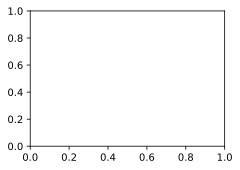

In [7]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 4.4.4.4. Linear Function Fitting (Underfitting)

RuntimeError: grad can be implicitly created only for scalar outputs

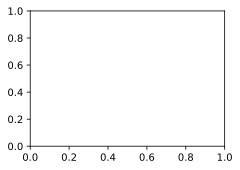

In [8]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 4.4.4.5. Higher-Order Polynomial Function Fitting (Overfitting)

RuntimeError: grad can be implicitly created only for scalar outputs

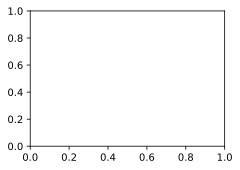

In [9]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

## 4.4.5. Summary

Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generalization error.

A validation set can be used for model selection, provided that it is not used too liberally.

Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.

We should choose an appropriately complex model and avoid using insufficient training samples.